# Introduction

Netflix is a leading online streaming platform offering a wide range of movies, TV shows, and original content to millions of subscribers worldwide. Known for on-demand viewing, diverse genres, and personalized recommendations, Netflix continuously updates its catalog with content from different countries and time periods, making it an ideal dataset for analyzing trends in movie releases and audience preferences.

This project focuses on analyzing Netflix movie data to extract key insights about the platform's movie catalog. The main goal is to understand patterns in genres, ratings, popularity, and release trends. By exploring these features, we aim to answer critical questions about viewer preferences, movie popularity, and content distribution over time.

The analysis involves:

* Identifying the most frequent genres of movies released on Netflix.

* Determining movies with the highest ratings (Vote_Average) and popularity.

* Finding movies with the lowest popularity.

* Analyzing release years to identify which years had the most movies produced.

This project uses exploratory data analysis (EDA) techniques including data cleaning, categorical analysis, value counts, histograms, and feature categorization to uncover trends and patterns in the dataset.

# Required Libraries for Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration & Preprocessing

In [2]:
df = pd.read_csv("mymovies.csv", lineterminator = "\n")

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df["Genre"].head(10)

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
5               Action, Crime, Thriller
6             Horror, Mystery, Thriller
7                              Thriller
8                Action, Crime, Fantasy
9                       Science Fiction
Name: Genre, dtype: object

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


**Converting Release Date to DateTime Format**

In [8]:
df["Release_Date"] = pd.to_datetime(df["Release_Date"])
print(df["Release_Date"].dtypes)

datetime64[ns]


**Extracting Year from Release Date**

In [9]:
df["Release_Date"] = df["Release_Date"].dt.year
print(df["Release_Date"].dtypes)

int32


In [10]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [11]:
# Dropping the Columns
colms = ["Overview", "Original_Language", "Poster_Url"]
df.drop(colms, axis = 1, inplace = True)

In [12]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [13]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


# Categorizing Vote_Average Column

We would cut the Vote_Average values and make categories: popular, average, below_avg, not_popular to describe it more using categorize_col() function.

**Function to Categorize Numerical Column into Bins**

In [14]:
def categorize_col(df, col, labels):

    edges = [df[col].describe()["min"],
             df[col].describe()["25%"],
             df[col].describe()["50%"],
             df[col].describe()["75%"],
             df[col].describe()["max"]
        ]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = "drop")
    return df

**Categorizing Vote Average into Popularity Levels**

In [15]:
labels = ["not_popular", "below_avg", "average", "popular"]

categorize_col(df, "Vote_Average", labels)
df["Vote_Average"].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [16]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [17]:
# Counts of Movies by Vote Average Category
df["Vote_Average"].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [18]:
# Handling Missing Values
df.dropna(inplace = True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

# We'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [19]:
df["Genre"] = df["Genre"].str.split(", ")
df = df.explode("Genre").reset_index(drop = True)

In [20]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [21]:
# Casting column into category

df["Genre"] = df["Genre"].astype("category")
df["Genre"].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [23]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization

**Setting Visualization Style**

In [24]:
sns.set_style("whitegrid")

 **Q1: What is the most frequent genre of movies released on Netflix ?**

In [25]:
df["Genre"].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

**Genre Distribution**

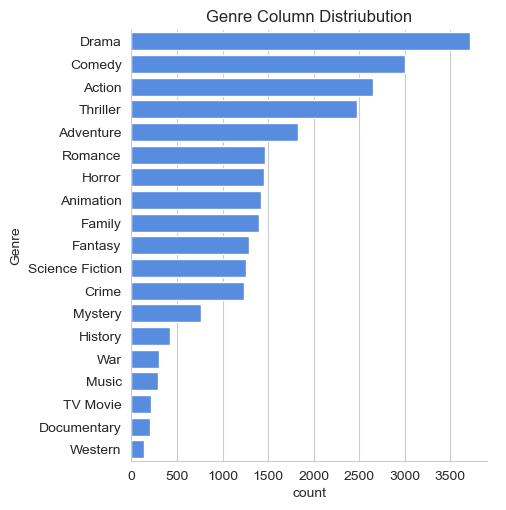

In [26]:
sns.catplot(y = "Genre", data = df, kind = "count",
            order = df["Genre"].value_counts().index,
            color = "#4287f5")
plt.title("Genre Column Distriubution")
plt.show()

**Q2: Which has highest votes in Vote_Average column ?**

In [27]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


**Distribution of Vote Average**

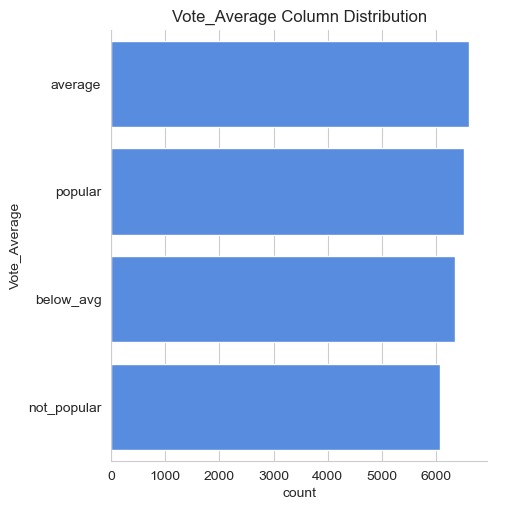

In [28]:
sns.catplot(y = "Vote_Average", data = df, kind = "count",
            order = df["Vote_Average"].value_counts().index,
            color = "#4287f5")
plt.title("Vote_Average Column Distribution")
plt.show()

**Q3: What movie got the highest popularity and what is its Genre ?**

In [29]:
# Most Popular Movie
df[df["Popularity"] == df["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


**Q4: What movie got lowest popularity and what is its Genre ?**

In [30]:
# Least Popular Movie
df[df["Popularity"] == df["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


**Q5: Which year has the most filmmed movies ?**

**Distribution of Release Year After Removing Duplicate Movies**

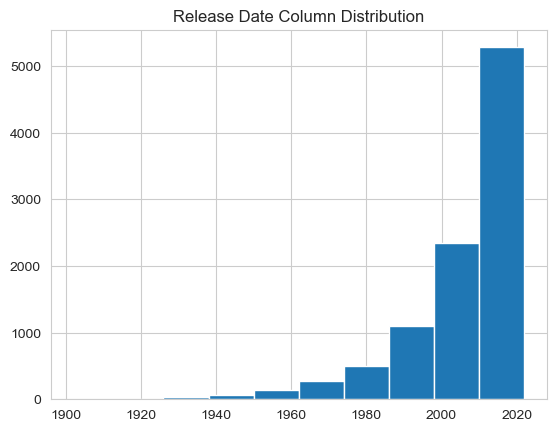

In [31]:
df_unique = df.drop_duplicates(subset=["Title", "Release_Date"])
df_unique["Release_Date"].hist()
plt.title("Release Date Column Distribution")
plt.show()